# K-Means Clustering (Partitioning clustering)

In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
import pandas as pd
%matplotlib inline


In [33]:
def check_missing_data(dataset):  
    print('Qtd rows X columns:{}'.format(dataset.shape))
    print('\nAre there any Missing values?:{}'.format(dataset.isnull().values.any()))
    print('\nTotal of missing ROWS values: {}'.format(dataset.shape[0] - dataset.dropna().shape[0]))
    print('\nMissing values by columns:\n{}'.format(dataset.isnull().sum()))
    print('\nTotal sum of missing values: {}'.format(dataset.isnull().sum().sum()))    
    print('\nPercentage of missing values for each variable:\n{}'.format(dataset.isnull().mean()))
    print('\n')
    print(dataset.info())
    

In [5]:
df_insurance = pd.DataFrame()

df_insurance = pd.read_csv("data/Health_Insurance.csv")

print(df_insurance.shape)

df_insurance.head()

(21805, 13)


,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0


In [34]:
check_missing_data(df_insurance)

Qtd rows X columns:(21805, 13)

Are there any Missing values?:True

Total of missing ROWS values: 11635

Missing values by columns:
ID                            0
City_Code                     0
Region_Code                   0
Accomodation_Type             0
Reco_Insurance_Type           0
Upper_Age                     0
Lower_Age                     0
Is_Spouse                     0
Health Indicator           5027
Holding_Policy_Duration    8603
Holding_Policy_Type        8603
Reco_Policy_Cat               0
Reco_Policy_Premium           0
dtype: int64

Total sum of missing values: 22233

Percentage of missing values for each variable:
ID                         0.000000
City_Code                  0.000000
Region_Code                0.000000
Accomodation_Type          0.000000
Reco_Insurance_Type        0.000000
Upper_Age                  0.000000
Lower_Age                  0.000000
Is_Spouse                  0.000000
Health Indicator           0.230543
Holding_Policy_Duration    0.3

In [64]:
# print(df_insurance.columns)

# categorical_features = ['Accomodation_Type', 'Reco_Insurance_Type', 'Is_Spouse', 'City_Code']

categorical_features = ['Accomodation_Type', 'Reco_Insurance_Type', 'Is_Spouse', 'Health Indicator']

for feature in categorical_features:
    print('\n{}\n{}'.format(feature, df_insurance[feature].value_counts()))



Accomodation_Type
Owned     12090
Rented     9715
Name: Accomodation_Type, dtype: int64

Reco_Insurance_Type
Individual    17341
Joint          4464
Name: Reco_Insurance_Type, dtype: int64

Is_Spouse
No     18227
Yes     3578
Name: Is_Spouse, dtype: int64

Health Indicator
X1    5614
X2    4516
X3    2846
X4    2442
X5     681
X6     514
X7      96
X8      41
X9      28
Name: Health Indicator, dtype: int64


In [65]:
# Drop Health Indicator null columns

#df_insurance.loc[df_insurance['Health Indicator'].isnull()]

print(df_insurance.shape)

df_insurance.drop(df_insurance.loc[df_insurance['Health Indicator'].isnull()].index, inplace=True)

print(df_insurance.shape)


(21805, 13)
(16778, 13)


In [66]:
# Accomodation_Type = {'Above': 3, 'Same': 2, 'Below': 1}
# df_numAttrib['Rating.Mortality'] = df_numAttrib['Rating.Mortality'].map(rating1)

df_insurance['Is_Spouse_value'] = df_insurance['Is_Spouse'].apply(lambda x:1 if x == 'Yes' else 0)

df_insurance['Reco_Insurance_Type_value'] = df_insurance['Reco_Insurance_Type'].apply(lambda x:1 if x == 'Individual' else 2)

df_insurance['Accomodation_Type_value'] = df_insurance['Accomodation_Type'].apply(lambda x:1 if x == 'Owned' else 2)

df_insurance.head()


,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Is_Spouse_value,Reco_Insurance_Type_value,Accomodation_Type_value
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8,1,2,1
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0,0,1,2
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0,0,1,2
4,50887,C1,951,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0,0,1,1
5,50888,C1,1329,Rented,Individual,24,24,No,X2,NaN,NaN,18,6150.0,0,1,2


In [67]:
from sklearn.preprocessing import LabelEncoder

label_encoder_city = LabelEncoder()
df_insurance['City_Code_value'] = label_encoder_city.fit_transform(df_insurance['City_Code'])

label_encoder_Health_Indicator = LabelEncoder()
df_insurance['Health Indicator_value'] = label_encoder_Health_Indicator.fit_transform(df_insurance['Health Indicator'])



In [68]:
df_insurance.columns

Index(['ID', 'City_Code', 'Region_Code', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Is_Spouse_value',
       'Reco_Insurance_Type_value', 'Accomodation_Type_value',
       'City_Code_value', 'Health Indicator_value'],
      dtype='object')

In [112]:
selected = ['City_Code_value', 'Region_Code', 'Accomodation_Type_value', 'Reco_Insurance_Type_value', 'Upper_Age', 'Is_Spouse_value', 'Health Indicator_value', 'Reco_Policy_Cat', 'Reco_Policy_Premium']

#selected = ['Region_Code', 'Accomodation_Type_value', 'Upper_Age', 'Health Indicator_value', 'Reco_Policy_Cat']

df_insurance_selected = pd.DataFrame()
df_insurance_selected = df_insurance[selected]

df_insurance_selected.head()


,City_Code_value,Region_Code,Accomodation_Type_value,Reco_Insurance_Type_value,Upper_Age,Is_Spouse_value,Health Indicator_value,Reco_Policy_Cat,Reco_Policy_Premium
1,30,7,1,2,69,1,0,18,32204.8
2,0,564,2,1,28,0,2,17,9240.0
3,22,1177,2,1,23,0,2,18,9086.0
4,0,951,1,1,75,0,2,5,22534.0
5,0,1329,2,1,24,0,1,18,6150.0


In [110]:
X = df_insurance_selected.values
X

array([[3.00000e+01, 1.00000e+00, 2.00000e+00, ..., 0.00000e+00,
        1.80000e+01, 3.22048e+04],
       [0.00000e+00, 2.00000e+00, 1.00000e+00, ..., 2.00000e+00,
        1.70000e+01, 9.24000e+03],
       [2.20000e+01, 2.00000e+00, 1.00000e+00, ..., 2.00000e+00,
        1.80000e+01, 9.08600e+03],
       ...,
       [3.00000e+00, 1.00000e+00, 1.00000e+00, ..., 2.00000e+00,
        1.00000e+00, 1.78360e+04],
       [1.00000e+00, 2.00000e+00, 1.00000e+00, ..., 3.00000e+00,
        1.90000e+01, 1.15680e+04],
       [1.10000e+01, 1.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        3.00000e+00, 2.30400e+04]])

In [71]:
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X)

X_scaled

array([[ 1.25316529, -1.20978502, -0.89443919, ..., -0.98981468,
         0.45247537,  2.76841639],
       [-1.22990043, -0.82187159,  1.118019  , ...,  0.39903004,
         0.29349831, -0.76875819],
       [ 0.59101443, -0.39495788,  1.118019  , ...,  0.39903004,
         0.45247537, -0.79247818],
       ...,
       [-0.98159385,  0.50553057, -0.89443919, ...,  0.39903004,
        -2.25013473,  0.55524867],
       [-1.14713157, -0.04743759,  1.118019  , ...,  1.0934524 ,
         0.61145244, -0.41018583],
       [-0.319443  ,  1.30433974, -0.89443919, ..., -0.29539232,
        -1.9321806 ,  1.35679959]])

In [44]:
# intertia = {}
# for k in range(1, 10):
#     #kmeans = KMeans(init = "k-means++", n_clusters=k, max_iter=1000)
#     kmeans = KMeans(init = "k-means++", n_clusters=k, n_init = 10, random_state=42)
#     kmeans.fit(X)
#     # Inertia: Sum of distances of samples to their closest cluster center
#     intertia[k] = kmeans.inertia_ 
    
# plt.figure(figsize=(8, 3.5))
# plt.plot(list(intertia.keys()), list(intertia.values()),"bo-")
# plt.xlabel("Number of cluster (K)", fontsize=14)
# plt.ylabel("Inertia", fontsize=14)
# plt.show()

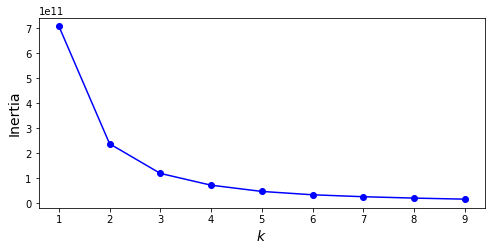

In [113]:
kmeans_per_k = [KMeans(init = "k-means++", n_clusters = k, n_init = 10,random_state=42).fit(X) for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.show()


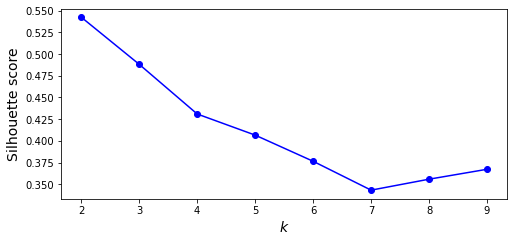

In [77]:
from sklearn.metrics import silhouette_score 

# The silhouette coefficient can vary between -1 and +1: 
# coefficient close to +1: the instance is well inside its own cluster and far from other clusters, 
# coefficient close to 0: close to a cluster boundary, 
# coefficient close to -1: the instance may have been assigned to the wrong cluster.

silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3.5))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
#plt.axis([1.8, 8.5, 0.55, 0.7])
#save_fig("silhouette_score_vs_k_plot")
plt.show()



In [79]:
values = ['Region_Code', 'Upper_Age']

model = KMeans(init = "k-means++", n_clusters = 2, n_init = 10, random_state=42)
pred = model.fit_predict(df_insurance_selected[values])

print(model, end="\n\n")
print("Centriods: \n" + str(model.cluster_centers_))


KMeans(n_clusters=2, random_state=42)

Centriods: 
[[ 871.76667862   44.91445481]
 [3473.30607892   44.73604692]]


Centriods: 
[[ 871.76667862   44.91445481]
 [3473.30607892   44.73604692]]


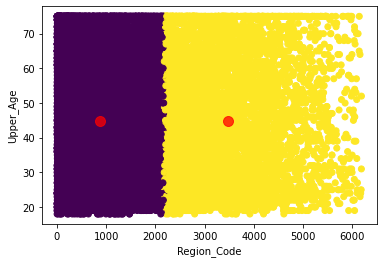

In [80]:


import matplotlib.pyplot as plt
plt.scatter(x=df_insurance_selected["Region_Code"],y=df_insurance_selected["Upper_Age"], c=pred)

centers = model.cluster_centers_

plt.xlabel("Region_Code")
plt.ylabel("Upper_Age")

print("Centriods: \n" + str(model.cluster_centers_))

plt.scatter(centers[:, 0], centers[:, 1], c='Red', s=100, alpha=0.75);

In [81]:
# Clus_dataSet = StandardScaler().fit_transform(X)
# Clus_dataSet

df_insurance["cluster"] = pred
df_insurance.groupby('cluster').mean()


,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Is_Spouse_value,Reco_Insurance_Type_value,Accomodation_Type_value,City_Code_value,Health Indicator_value
cluster,,,,,,,,,,,,
0,61788.485509,870.948587,44.909197,42.714760,2.432945,15.339524,14296.834796,0.164827,1.208524,1.446927,14.365904,1.423419
1,61840.539677,3471.691816,44.746671,42.709569,2.446747,14.786437,14101.030605,0.166164,1.201136,1.439553,15.835967,1.429256


In [52]:
df_insurance.columns

Index(['ID', 'City_Code', 'Region_Code', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Is_Spouse_value',
       'Reco_Insurance_Type_value', 'Accomodation_Type_value',
       'City_Code_value', 'Health Indicator_value', 'cluster'],
      dtype='object')

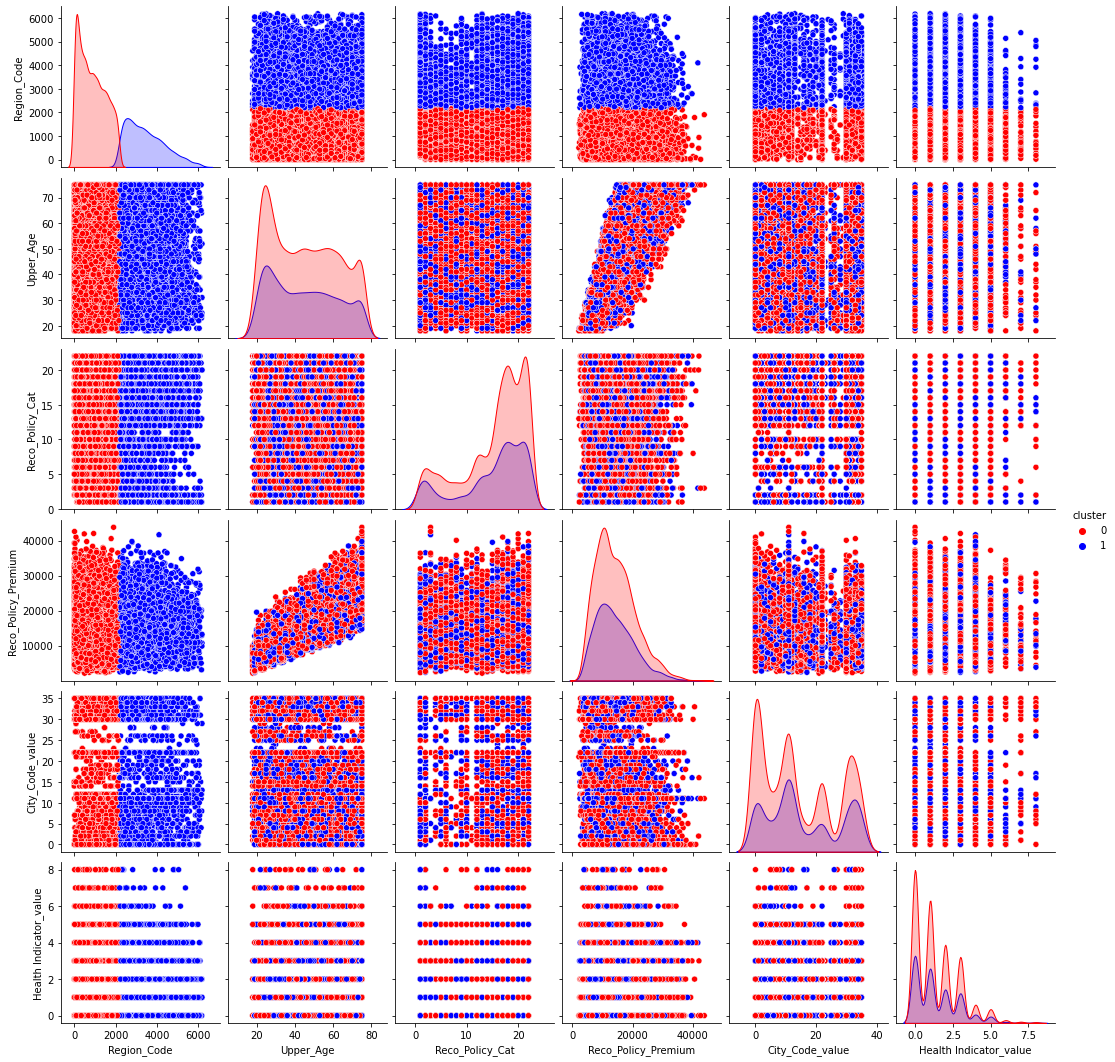

In [83]:
import seaborn as sns

sel_columns = ['City_Code', 'Region_Code', 'Upper_Age', 
        'Reco_Policy_Cat', 'Reco_Policy_Premium', 
        'City_Code_value', 'Health Indicator_value', 'cluster']

# sns.pairplot(df_insurance[sel_columns], hue='cluster', palette='Accent')

sns.pairplot(df_insurance[sel_columns], hue='cluster', palette=['red', 'blue'])




In [84]:
df_insurance.columns

Index(['ID', 'City_Code', 'Region_Code', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Is_Spouse_value',
       'Reco_Insurance_Type_value', 'Accomodation_Type_value',
       'City_Code_value', 'Health Indicator_value', 'cluster'],
      dtype='object')

In [85]:
df_insurance.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Is_Spouse_value,Reco_Insurance_Type_value,Accomodation_Type_value,City_Code_value,Health Indicator_value,cluster
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8,1,2,1,30,0,0
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0,0,1,2,0,2,0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0,0,1,2,22,2,0
4,50887,C1,951,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0,0,1,1,0,2,0
5,50888,C1,1329,Rented,Individual,24,24,No,X2,NaN,NaN,18,6150.0,0,1,2,0,1,0


In [138]:

selected = ['City_Code', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Upper_Age', 'Is_Spouse',
       'Health Indicator', 'cluster']


# selected = ['City_Code_value', 
#             'Region_Code', 
#             'Accomodation_Type_value',
#             'Reco_Insurance_Type_value',
#             'Upper_Age',
#             'Is_Spouse_value',
#             'Health Indicator_value',
#             'Reco_Policy_Cat',
#             'Reco_Policy_Premium', 'cluster']

df_insurance[selected].groupby(['cluster','Accomodation_Type', 'Reco_Insurance_Type']).mean()



Upper_Age
cluster Accomodation_Type Reco_Insurance_Type           
0       Owned             Individual           50.016705
                          Joint                54.768673
        Rented            Individual           35.937093
                          Joint                44.771698
1       Owned             Individual           49.734756
                          Joint                54.198606
        Rented            Individual           36.174682
                          Joint                42.180147

count    16778.000000
mean      1744.115032
std       1435.930166
min          1.000000
25%        535.000000
50%       1391.000000
75%       2705.000000
max       6185.000000
Name: Region_Code, dtype: float64


<AxesSubplot:>

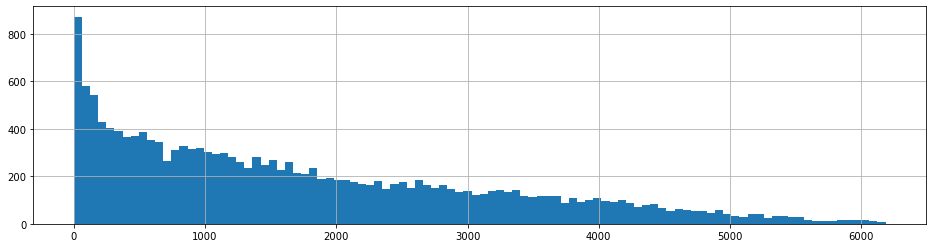

In [142]:
print (df_insurance['Region_Code'].describe())

df_insurance["Region_Code"].hist(figsize=[16,4],bins=100)

<AxesSubplot:>

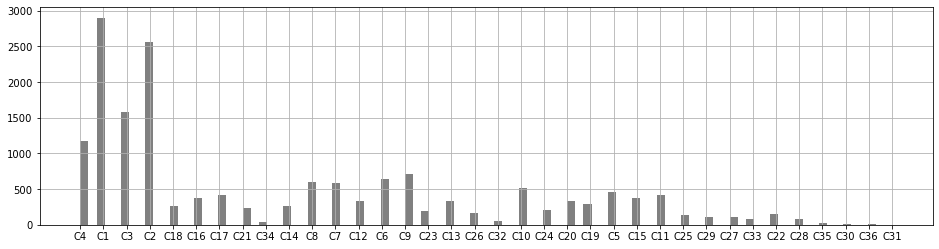

In [140]:


df_insurance["City_Code"].hist(figsize=[16,4], bins=100, color='grey')


In [118]:
df_insurance["City_Code"].value_counts()

C1     2900
C2     2561
C3     1586
C4     1180
C9      710
C6      637
C8      597
C7      592
C10     518
C5      453
C17     423
C11     414
C15     373
C16     369
C20     340
C12     336
C13     327
C19     290
C14     265
C18     260
C21     241
C24     209
C23     198
C26     169
C22     153
C25     139
C29     108
C27     103
C28      86
C33      86
C32      58
C34      40
C35      26
C30      16
C36      13
C31       2
Name: City_Code, dtype: int64